In [1]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:

In [2]:
import torch
from transformers import BitsAndBytesConfig, pipeline

In [3]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
)

In [4]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [6]:
pipe = pipeline("image-to-text",
                model = model_id,
                model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [8]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
warnings.filterwarnings("ignore")
from PIL import Image

In [9]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


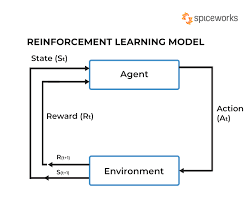

In [13]:
image = Image.open("/content/testimg.png")
image

In [17]:
max_new_tokens = 300

prompt_instruction = """
Describe the image given in as much detail as possible,
Whether it is a painting, a photograph, whatever you undertsand from the picture,
explain that to the user.
"""

prompt = "USER: <image>" + prompt_instruction + "\nASSISTANT:"

output = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens":200})

print(output[0]["generated_text"])

USER:  
Describe the image given in as much detail as possible,
Whether it is a painting, a photograph, whatever you undertsand from the picture,
explain that to the user.

ASSISTANT: The image is a diagram or flowchart, possibly a learning model, that illustrates the relationship between various elements. The main focus is on the word "reinforcement," which is a key concept in the learning process. The diagram also includes the word "agent," suggesting that the learning process involves an active participant or agent.

The flowchart is divided into different sections, with each section possibly representing a different aspect of the learning process. The overall layout of the diagram is organized and easy to understand, making it a useful visual aid for learning or teaching purposes.


In [18]:
for sent in sent_tokenize(output[0]["generated_text"]):
  print(sent)

USER:  
Describe the image given in as much detail as possible,
Whether it is a painting, a photograph, whatever you undertsand from the picture,
explain that to the user.
ASSISTANT: The image is a diagram or flowchart, possibly a learning model, that illustrates the relationship between various elements.
The main focus is on the word "reinforcement," which is a key concept in the learning process.
The diagram also includes the word "agent," suggesting that the learning process involves an active participant or agent.
The flowchart is divided into different sections, with each section possibly representing a different aspect of the learning process.
The overall layout of the diagram is organized and easy to understand, making it a useful visual aid for learning or teaching purposes.


In [20]:
from gtts import gTTS
import numpy as np

In [21]:
torch.cuda.is_available()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.4.1+cu121 (cuda)


In [27]:
import whisper
model = whisper.load_model("medium", device=DEVICE)

In [30]:
print(
    f"Model is {'Multilingual' if model.is_multilingual else 'English-only'}"
    f" and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters in total."
)

Model is Multilingual and has 762,321,920 parameters in total.


In [37]:
import re

input = "What is the logo at the upper-right corner of the image?"

image = Image.open("/content/testimg.png")

prompt_instruction = """
Act as an expert in image description, using as much detail as possible, answer the following questions
""" + input

prompt = "USER: <image>" + prompt_instruction + "\nASSISTANT:"

output = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens":300})


match = re.search(r'ASSISTANT:\s*(.*)', output[0]["generated_text"])

if match:
  extracted_text = match.group(1)
  print(extracted_text)
else:
  print("No match found.")
for sent in sent_tokenize(output[0]["generated_text"]):
  print(sent)

The logo at the upper-right corner of the image is a Spiceworks logo.
USER:  
Act as an expert in image description, using as much detail as possible, answer the following questions
What is the logo at the upper-right corner of the image?
ASSISTANT: The logo at the upper-right corner of the image is a Spiceworks logo.


In [38]:
import datetime
import os
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(" ", "_")
logfile = f'{tstamp}_log.txt'
def write_history(text):
  with open(logfile, "a", encoding="utf-8") as f:
    f.write(text)
    f.write("\n")
  f.close()

In [39]:
import re
import requests
from PIL import Image

def img_to_txt(input_text, input_image):

  image = Image.open(input_image)

  write_history(f"Input Text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
  if type(input_text) == tuple:
    prompt_instruction = """
    Act as an expert in image description, using as much detail as possible, describe the input image given to you.
    """
  else:
    prompt_instruction = """
    Act as an expert in image description, using as much detail as possible, describe the input image given to you.
    """ + input_text

  write_history(f"prompt_instruction: {prompt_instruction}")

  prompt = "USER: <image>" + prompt_instruction + "\nASSISTANT:"

  output = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens":300})

  if output is not None and len(output[0]["generate_text"]) > 0:
    match = re.search(r'ASSISTANT:\s*(.*)', output[0]["generated_text"])
    if match:
      reply = match.group(1)
    else:
      reply = "No response found."
  else:
    reply = "No response generated."

  return reply

In [40]:
def transcribe(audio):

  if audio is None or audio == " ":
    return (" ", " ", None)

  audio = whisper.load_audio(audio)
  audio = whisper.pad_or_trim(audio)

  mel = whisper.log_mel_spectrogram(audio).to(model.device)

  _, probs = model.detect_language(mel)

  options = whisper.DecodingOptions()
  result = whisper.decode(model, mel, options)
  result_text = result.text

  return result_text

In [42]:
def text_to_speech(text, file_path):
  language = "en",
  audio_obj = gTTS(text=text, lang=language, slow=False)
  audio_obj.save(file_path)
  return file_path

In [48]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [49]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [50]:
import gradio as gr
import base64
import os

def process_inputs(audio_path, image_path):

  speech_to_text = transcribe(audio_path)

  if image_path:
    chatgpt_output = img_to_txt(speech_to_text, image_path)
  else:
    chatgpt_output = "No image provided."

  processed_audio_path = text_to_speech(chatgpt_output, "Temp.mp3")

  return speech_to_text, chatgpt_output, processed_audio_path


In [51]:
# Create the interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="ChatGPT Output"),
        gr.Audio("Temp.mp3")
    ],
    title="Learn OpenAI Whisper: Image processing with Whisper and Llava",
    description="Upload an image and interact via voice input and audio response."
)

# Launch the interface
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://e8a5375ca866a805ca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e8a5375ca866a805ca.gradio.live
